In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

* States: NJ, DC, NY, CN, KY, NE, ID, NM, MT, HI

In [86]:
# load in obesity
obese_data = pd.read_csv('Clean_2011_2016/obesity_over_65.csv')
costs_per_cap = pd.read_csv('Clean_2011_2016/medicare_costpercapita_2011_2016.csv')

In [87]:
obese_data_df = pd.DataFrame(obese_data)
costs_df = pd.DataFrame(costs_per_cap)

In [111]:
costs_df.rename(columns={"Cost per Capita":"State"},inplace=True)
costs_df.set_index('State',inplace=True)
costs_df.head()

,2011,2012,2013,2014,2015,2016
State,,,,,,
AK,8367.24,8171.94,8438.93,8643.21,8818.08,9255.28
AL,8687.16,8697.49,8584.16,8677.32,8942.93,9047.82
AR,8069.73,8131.90,8114.43,8300.60,8537.12,8693.43
AZ,8987.55,8987.89,8950.73,8911.07,9078.82,9222.18
CA,10728.40,10729.40,10814.94,10821.82,11155.99,11517.22


In [131]:
# Eastern-most states:
eastern_states_cost = pd.DataFrame(costs_df.loc['NJ'])
eastern_states_cost['DC'] = costs_df.loc['DC']
eastern_states_cost['NY']= costs_df.loc['NY']
eastern_states_cost['CT'] = costs_df.loc['CT']
eastern_states_cost['KY'] = costs_df.loc['KY']

# Western-most states
western_states_cost = pd.DataFrame(costs_df.loc['NE'])
western_states_cost['ID'] = costs_df.loc['ID']
western_states_cost['NM']= costs_df.loc['NM']
western_states_cost['MT'] = costs_df.loc['MT']
western_states_cost['HI'] = costs_df.loc['HI']
#western_states_cost.head()
eastern_states_cost.head()

,NJ,DC,NY,CT,KY
2011,11427.77,11824.84,11176.05,10911.93,8926.59
2012,11286.61,12009.94,11087.08,10872.84,8916.76
2013,11247.35,11729.49,11095.27,11150.62,8929.28
2014,11476.91,11639.70,11245.99,11315.89,8914.39
2015,11707.10,11717.40,11489.62,11531.02,9127.09


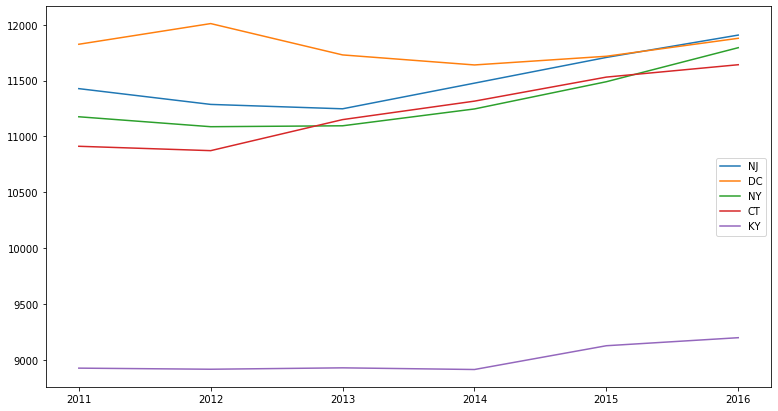

In [128]:
plt.figure(figsize=(13,7))
plt.plot(eastern_states_cost)
plt.legend(eastern_states_cost.columns)
plt.show()

In [25]:
#Group by state
broken_down = obese_data_df.groupby('State')
#broken_down.count()


In [81]:
#get individual state groups & convert to DataFrame
# Eastern-most states
nj_group = pd.DataFrame(broken_down.get_group("NJ"))
dc_group = pd.DataFrame(broken_down.get_group("DC"))
ny_group = pd.DataFrame(broken_down.get_group("NY"))
ct_group = pd.DataFrame(broken_down.get_group("CT"))
ky_group = pd.DataFrame(broken_down.get_group("KY"))

# Western-most states:
ne_group = pd.DataFrame(broken_down.get_group("NE"))
id_group = pd.DataFrame(broken_down.get_group("ID"))
nm_group = pd.DataFrame(broken_down.get_group("NM"))
mt_group = pd.DataFrame(broken_down.get_group("MT"))
hi_group = pd.DataFrame(broken_down.get_group("HI"))

In [82]:
#sort values
#East
nj_group.sort_values(by=["Year"], inplace=True)
dc_group.sort_values(by=["Year"], inplace=True)
ny_group.sort_values(by=["Year"], inplace=True)
ct_group.sort_values(by=["Year"], inplace=True)
ky_group.sort_values(by=["Year"], inplace=True)

#West
ne_group.sort_values(by=["Year"], inplace=True)
id_group.sort_values(by=["Year"], inplace=True)
nm_group.sort_values(by=["Year"], inplace=True)
mt_group.sort_values(by=["Year"], inplace=True)
hi_group.sort_values(by=["Year"], inplace=True)

In [83]:
mt_group

,State,Year,Percent Adults,Sample_Size
156,MT,2011,21.9,3177.0
158,MT,2012,22.3,2743.0
161,MT,2013,23.4,3090.0
159,MT,2014,26.7,2693.0
160,MT,2015,23.2,2173.0
157,MT,2016,24.3,2148.0


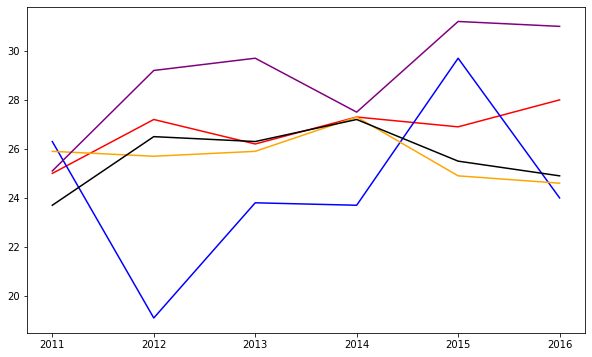

In [59]:
#Example plot for percentage of obese adults >65
plt.figure(figsize=(10,6))
plt.plot(nj_group["Year"],nj_group["Percent Adults"], color="red")
plt.plot(dc_group["Year"],dc_group["Percent Adults"], color="blue")
plt.plot(ny_group["Year"],ny_group["Percent Adults"], color="orange")
plt.plot(ct_group["Year"],ct_group["Percent Adults"], color="black")
plt.plot(ky_group["Year"],ky_group["Percent Adults"], color="purple")


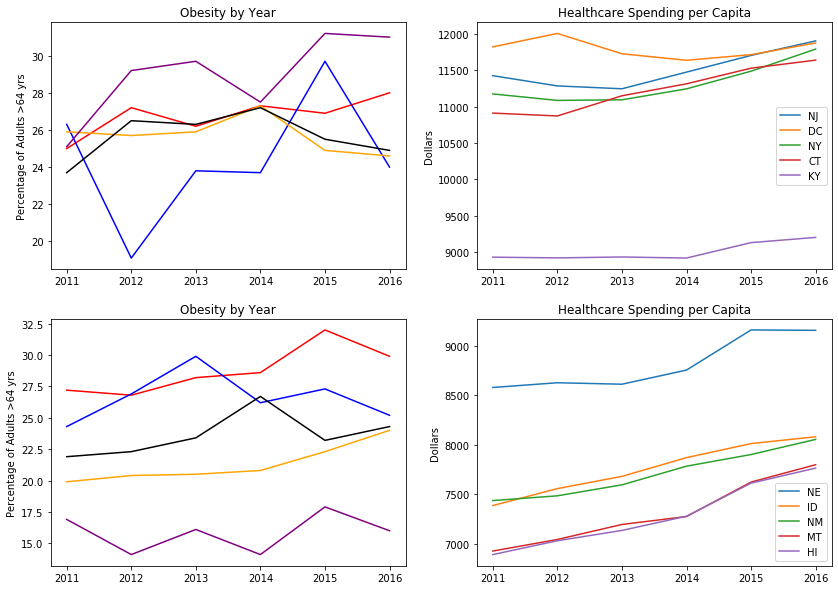

In [135]:
#setup figure
fig1 = plt.figure(figsize = (14,10))
axes1 = fig1.add_subplot(2,2,1)
axes2 = fig1.add_subplot(2,2,2)
axes3 = fig1.add_subplot(2,2,3)
axes4 = fig1.add_subplot(2,2,4)

#plotting for first axes (box 1)
axes1.plot(nj_group["Year"],nj_group["Percent Adults"], color="red")
axes1.plot(dc_group["Year"],dc_group["Percent Adults"], color="blue")
axes1.plot(ny_group["Year"],ny_group["Percent Adults"], color="orange")
axes1.plot(ct_group["Year"],ct_group["Percent Adults"], color="black")
axes1.plot(ky_group["Year"],ky_group["Percent Adults"], color="purple")
axes1.set_ylabel("Percentage of Adults >64 yrs")
axes1.set_title("Obesity by Year")

#plotting for second axes (box 2)
axes2.plot(eastern_states_cost)
axes2.legend(eastern_states_cost.columns)
axes2.set_ylabel("Dollars")
axes2.set_title("Healthcare Spending per Capita")
#plt.show()

#plotting for third axes (box 3)
axes3.plot(ne_group["Year"],ne_group["Percent Adults"], color="red")
axes3.plot(id_group["Year"],id_group["Percent Adults"], color="blue")
axes3.plot(nm_group["Year"],nm_group["Percent Adults"], color="orange")
axes3.plot(mt_group["Year"],mt_group["Percent Adults"], color="black")
axes3.plot(hi_group["Year"],hi_group["Percent Adults"], color="purple")
axes3.set_ylabel("Percentage of Adults >64 yrs")
axes3.set_title("Obesity by Year")

#plotting for fourth axes (box 4)
axes4.plot(western_states_cost)
axes4.legend(western_states_cost.columns)
axes4.set_ylabel("Dollars")
axes4.set_title("Healthcare Spending per Capita")

fig1.savefig('Obesity_vs_costpercap.png')
